# Omdena Local Chapters: Air Quality Prediction for Mexico City
**Name**: Sundus Yawar <br>
**Phase**: Data Collection <br>
**Data**: Air Pollutant Concentration Historical Data for last 4 years <br>
**Data Sources**: openweather API for historical air pollution data and open meteo for historical weather data<br>

In [10]:
import requests
import json
import pandas as pd
from datetime import datetime

## Collecting Historical Pollutants Data

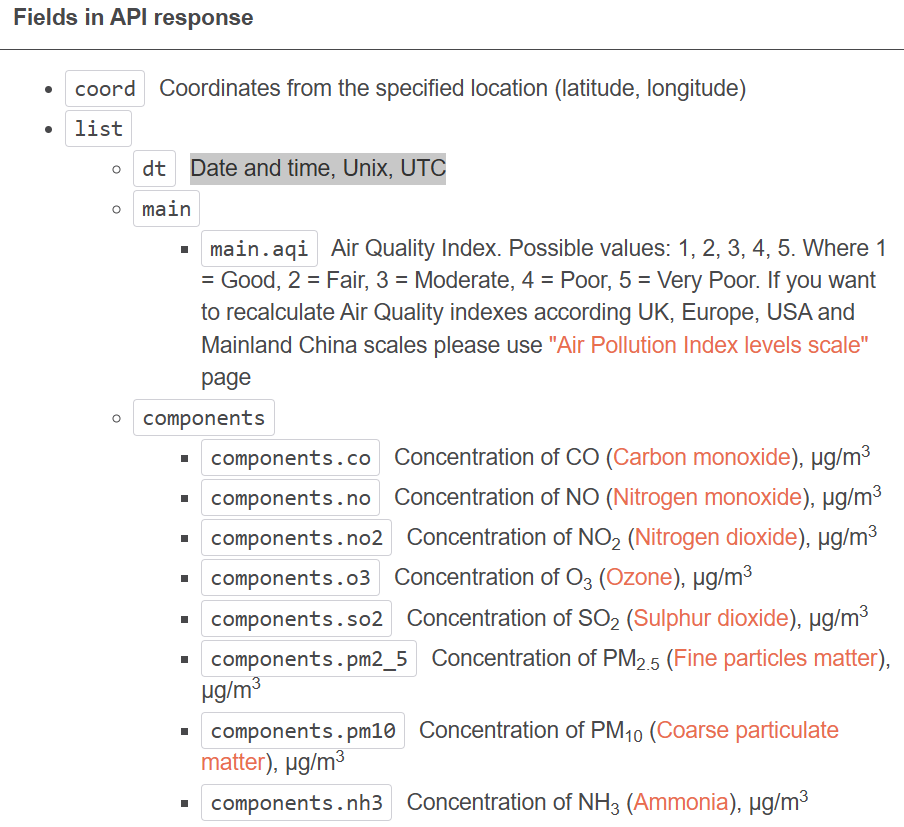

In [12]:
start_date = datetime(2020, 11, 27, 12, 0) #Nov 27th, 2020 @ 12 pm
end_date = datetime(2024, 11, 7, 12, 0) #Nov 7th, 2024 @ 12 pm

#Converting to unix timestamp for api call
start_unix = int(start_date.timestamp())
end_unix = int(end_date.timestamp())
     
print(f"start_unix:{start_unix}\nend_unix:{end_unix}")

start_unix:1606496400
end_unix:1730998800


In [27]:
from dotenv import load_dotenv
import os

# load env file
load_dotenv("makefile.env")

# extract api_key from env file
app_id = os.getenv("API_KEY")
#print(app_id)

In [19]:
#Format
# --> http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={API key}
# Used this site to get latitude and longitude for Mexico City: https://www.latlong.net/
params = {
    "lat": "19.432608",
    "lon": "-99.133209",
    "start": "1606496400",
    "end": "1730998800",
    "appid": app_id
}
response = requests.get("http://api.openweathermap.org/data/2.5/air_pollution/history", params=params)
response.json()

{'coord': {'lon': -99.1332, 'lat': 19.4326},
 'list': [{'main': {'aqi': 4},
   'components': {'co': 834.47,
    'no': 4.08,
    'no2': 23.65,
    'o3': 150.2,
    'so2': 44.82,
    'pm2_5': 37.87,
    'pm10': 42.38,
    'nh3': 0.82},
   'dt': 1606496400},
  {'main': {'aqi': 4},
   'components': {'co': 754.36,
    'no': 2.04,
    'no2': 15.08,
    'o3': 191.69,
    'so2': 41.49,
    'pm2_5': 38.62,
    'pm10': 42.09,
    'nh3': 0.48},
   'dt': 1606500000},
  {'main': {'aqi': 3},
   'components': {'co': 460.63,
    'no': 1.03,
    'no2': 6.34,
    'o3': 147.34,
    'so2': 22.17,
    'pm2_5': 20.17,
    'pm10': 21.85,
    'nh3': 0.29},
   'dt': 1606503600},
  {'main': {'aqi': 3},
   'components': {'co': 393.87,
    'no': 0.89,
    'no2': 5.36,
    'o3': 138.76,
    'so2': 18.6,
    'pm2_5': 15.48,
    'pm10': 16.76,
    'nh3': 0.34},
   'dt': 1606507200},
  {'main': {'aqi': 3},
   'components': {'co': 410.56,
    'no': 0.85,
    'no2': 6,
    'o3': 148.77,
    'so2': 20.27,
    'pm2_5': 1

In [21]:
data = response.json()

# Storing the data as a python dictionary, so I can store it in pandas data frame for data wrangling
entries = []
for item in data["list"]:
    entry = {
        "AirQualityIndex": item["main"]["aqi"],
        "CO_(μg/m³)": item["components"]["co"],
        "NO_(μg/m³)": item["components"]["no"],
        "NO2_(μg/m³)": item["components"]["no2"],
        "O3_(μg/m³)": item["components"]["o3"],
        "SO2_(μg/m³)": item["components"]["so2"],
        "PM2_5_(μg/m³)": item["components"]["pm2_5"],
        "PM10_(μg/m³)": item["components"]["pm10"],
        "NH3_(μg/m³)": item["components"]["nh3"],
        "timestamp": item["dt"]
        
    }
    entries.append(entry)

In [22]:
# Creating data frame containing the air quality data
air_quality_df = pd.DataFrame(entries)
print(air_quality_df.shape)
air_quality_df.head(5)

(34249, 10)


,AirQualityIndex,CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³),timestamp
0,4,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82,1606496400
1,4,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48,1606500000
2,3,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29,1606503600
3,3,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34,1606507200
4,3,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40,1606510800


In [36]:
air_quality_df.isna().sum()

AirQualityIndex    0
CO_(μg/m³)         0
NO_(μg/m³)         0
NO2_(μg/m³)        0
O3_(μg/m³)         0
SO2_(μg/m³)        0
PM2_5_(μg/m³)      0
PM10_(μg/m³)       0
NH3_(μg/m³)        0
dtype: int64

### Wrangling the pollutant data

In [24]:
# Making timestamp column readable
air_quality_df['timestamp'] = pd.to_datetime(air_quality_df['timestamp'], unit='s', utc=True)
air_quality_df.head(5)

,AirQualityIndex,CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³),timestamp
0,4,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82,2020-11-27 17:00:00+00:00
1,4,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48,2020-11-27 18:00:00+00:00
2,3,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29,2020-11-27 19:00:00+00:00
3,3,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34,2020-11-27 20:00:00+00:00
4,3,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40,2020-11-27 21:00:00+00:00


In [25]:
# I want timestamp to be the index
air_quality_df.set_index("timestamp", inplace=True)
air_quality_df.head(5)

,AirQualityIndex,CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
timestamp,,,,,,,,,
2020-11-27 17:00:00+00:00,4,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82
2020-11-27 18:00:00+00:00,4,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48
2020-11-27 19:00:00+00:00,3,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29
2020-11-27 20:00:00+00:00,3,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34
2020-11-27 21:00:00+00:00,3,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40


In [26]:
air_quality_df.to_csv("air_quality_data.csv")

## Collecting Historical Weather Data

**Fields in API Response** <br>
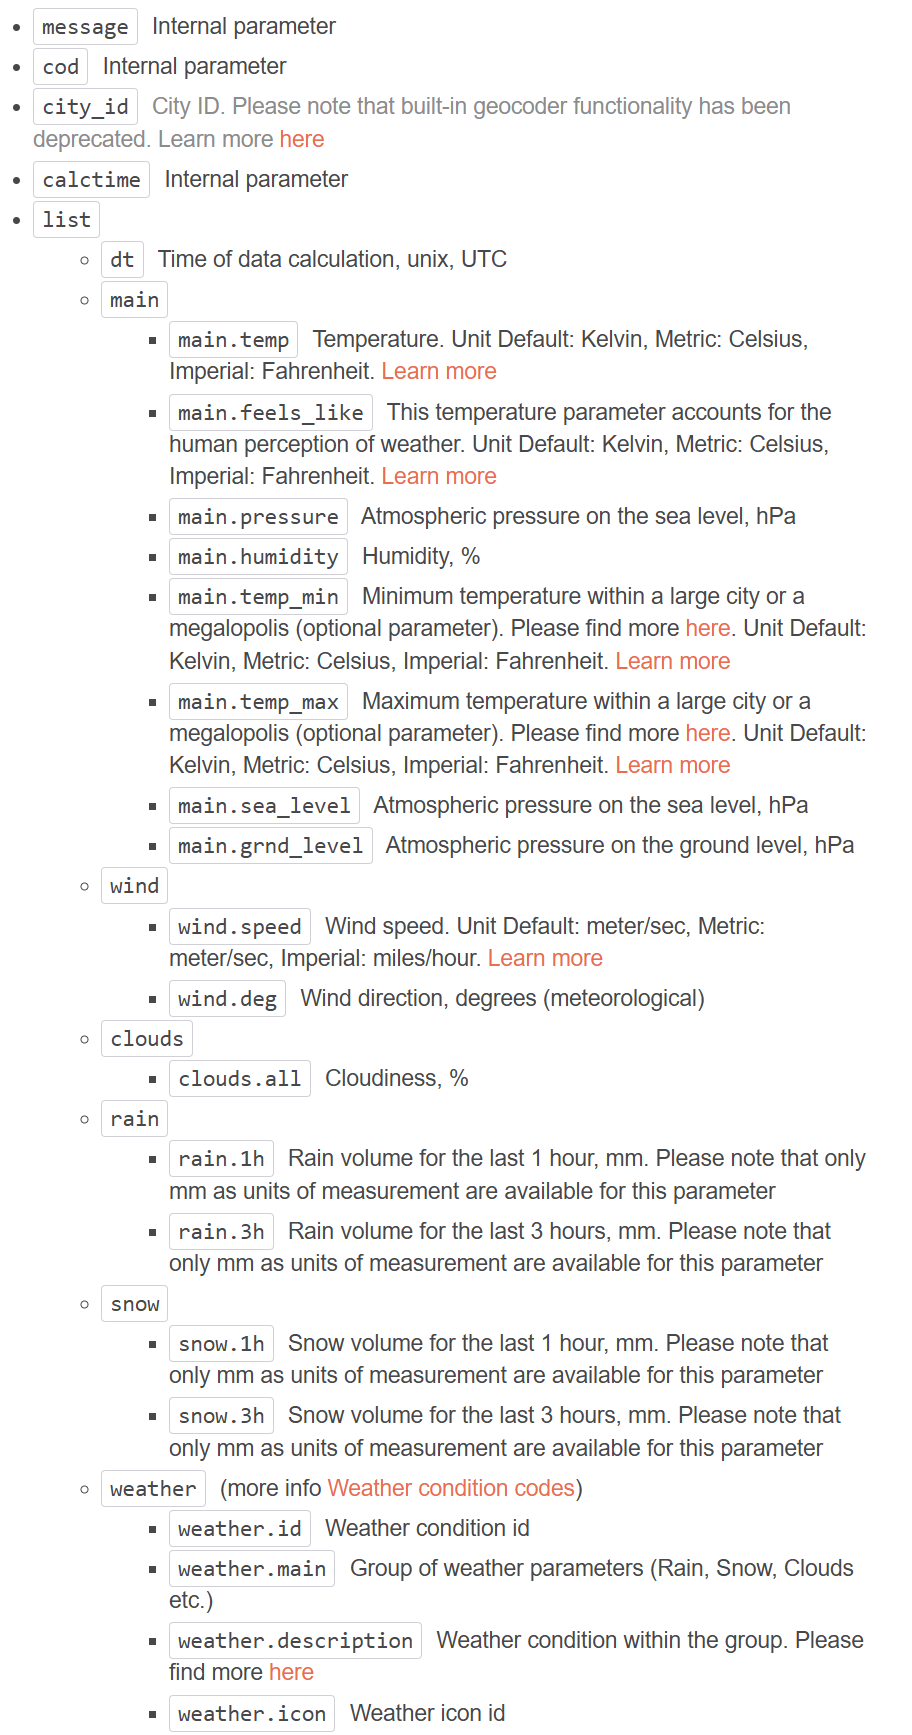

In [33]:
# Format
# https://history.openweathermap.org/data/2.5/history/city?lat=41.85&lon=-87.65&appid={API key}
#historic data for weather is not part of free package that's why I had to look for another source for weather data
params = {
    "lat": "19.432608",
    "lon": "-99.133209",
    "type": "hour",
    "start": "1606496400",
    "end": "1730998800",
    "appid": app_id
}
response_w = requests.get("https://history.openweathermap.org/data/2.5/history/city", params=params)
response_w.json()

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [39]:
# Data source: https://open-meteo.com/en/docs/historical-weather-api#start_date=2020-11-27&end_date=2024-11-07&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,precipitation_hours,shortwave_radiation_sum
weather_df = pd.read_csv("open-meteo-mexico-city-hourly-weather-data.csv")
weather_df.head(5)

,time,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),cloud_cover_mid_(%),cloud_cover_high_(%),wind_speed_10m_(km/h),wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°)
0,2020-11-27T00:00,23.3,21.0,0.0,19.7,0.0,1011.3,786.9,88.0,0.0,5.0,99.0,10.2,18.1,350.0,347.0
1,2020-11-27T01:00,21.5,23.0,-0.3,17.5,0.0,1013.6,787.5,95.0,0.0,9.0,95.0,12.4,20.3,36.0,33.0
2,2020-11-27T02:00,19.5,41.0,5.7,17.6,0.0,1015.1,787.3,97.0,0.0,0.0,97.0,5.6,14.4,333.0,3.0
3,2020-11-27T03:00,17.8,43.0,5.0,15.3,0.0,1016.6,787.3,98.0,0.0,0.0,98.0,8.4,15.1,280.0,320.0
4,2020-11-27T04:00,16.7,47.0,5.3,14.0,0.0,1017.4,787.3,94.0,0.0,0.0,94.0,10.6,19.6,288.0,317.0


In [40]:
weather_df.shape

(34608, 16)

In [41]:
weather_df.isna().sum()

time                          0
temperature_2m_(°C)          47
relative_humidity_2m_(%)     47
dew_point_2m_(°C)            47
apparent_temperature_(°C)    47
precipitation_(mm)           47
pressure_msl_(hPa)           47
surface_pressure_(hPa)       47
cloud_cover_(%)              47
cloud_cover_low_(%)          47
cloud_cover_mid_(%)          47
cloud_cover_high_(%)         47
wind_speed_10m_(km/h)        47
wind_speed_100m_(km/h)       47
wind_direction_10m(°)        47
wind_direction_100m_(°)      47
dtype: int64

### Cleaning Weather Data

In [42]:
weather_df_filtered = weather_df[weather_df['temperature_2m_(°C)'].isna()]
weather_df_filtered

,time,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),cloud_cover_mid_(%),cloud_cover_high_(%),wind_speed_10m_(km/h),wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°)
34561,2024-11-06T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34562,2024-11-06T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34563,2024-11-06T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34564,2024-11-06T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34565,2024-11-06T05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34566,2024-11-06T06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34567,2024-11-06T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34568,2024-11-06T08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34569,2024-11-06T09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34570,2024-11-06T10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
weather_df_filtered.shape

(47, 16)

In [44]:
weather_df_filtered.isna().sum()

time                          0
temperature_2m_(°C)          47
relative_humidity_2m_(%)     47
dew_point_2m_(°C)            47
apparent_temperature_(°C)    47
precipitation_(mm)           47
pressure_msl_(hPa)           47
surface_pressure_(hPa)       47
cloud_cover_(%)              47
cloud_cover_low_(%)          47
cloud_cover_mid_(%)          47
cloud_cover_high_(%)         47
wind_speed_10m_(km/h)        47
wind_speed_100m_(km/h)       47
wind_direction_10m(°)        47
wind_direction_100m_(°)      47
dtype: int64

In [45]:
# Drop rows in weather_df that are present in the filtered df
weather_df = weather_df.drop(weather_df_filtered.index)
weather_df.isna().sum()

time                         0
temperature_2m_(°C)          0
relative_humidity_2m_(%)     0
dew_point_2m_(°C)            0
apparent_temperature_(°C)    0
precipitation_(mm)           0
pressure_msl_(hPa)           0
surface_pressure_(hPa)       0
cloud_cover_(%)              0
cloud_cover_low_(%)          0
cloud_cover_mid_(%)          0
cloud_cover_high_(%)         0
wind_speed_10m_(km/h)        0
wind_speed_100m_(km/h)       0
wind_direction_10m(°)        0
wind_direction_100m_(°)      0
dtype: int64

In [47]:
# more data
more_w_features_df = pd.read_csv("open-meteo-more-weather-features-daily-data.csv")
print(more_w_features_df.shape)
more_w_features_df.head(5)

(1442, 8)


,time,temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
0,11/27/2020,25.9,8.6,18.0,39870.84,37097.05,0,20.72
1,11/28/2020,25.9,11.7,17.9,39837.77,37059.49,0,20.46
2,11/29/2020,25.0,8.7,17.1,39806.22,37023.49,0,20.11
3,11/30/2020,22.3,12.9,16.5,39775.79,34460.58,1,12.86
4,12/1/2020,22.2,6.1,12.6,39746.46,35809.52,2,17.74


In [48]:
# I want dates in this data frame to follow same date patter as weather_df, necessary for join
more_w_features_df['time'] = pd.to_datetime(more_w_features_df['time'], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")
more_w_features_df.head(5)

,time,temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
0,2020-11-27,25.9,8.6,18.0,39870.84,37097.05,0,20.72
1,2020-11-28,25.9,11.7,17.9,39837.77,37059.49,0,20.46
2,2020-11-29,25.0,8.7,17.1,39806.22,37023.49,0,20.11
3,2020-11-30,22.3,12.9,16.5,39775.79,34460.58,1,12.86
4,2020-12-01,22.2,6.1,12.6,39746.46,35809.52,2,17.74


In [51]:
more_w_features_df.dtypes

time                                object
temperature_2m_max_(°C)            float64
temperature_2m_min_(°C)            float64
temperature_2m_mean_(°C)           float64
daylight_duration_(s)              float64
sunshine_duration_(s)              float64
precipitation_hours_(h)              int64
shortwave_radiation_sum_(MJ/m²)    float64
dtype: object

In [52]:
weather_df.dtypes

time                          object
temperature_2m_(°C)          float64
relative_humidity_2m_(%)     float64
dew_point_2m_(°C)            float64
apparent_temperature_(°C)    float64
precipitation_(mm)           float64
pressure_msl_(hPa)           float64
surface_pressure_(hPa)       float64
cloud_cover_(%)              float64
cloud_cover_low_(%)          float64
cloud_cover_mid_(%)          float64
cloud_cover_high_(%)         float64
wind_speed_10m_(km/h)        float64
wind_speed_100m_(km/h)       float64
wind_direction_10m(°)        float64
wind_direction_100m_(°)      float64
dtype: object

In [54]:
# I want to merge weather data with more_w_features_df

# Converting time column in weather_df to datetime format and store date part only
weather_df['date'] = pd.to_datetime(weather_df['time']).dt.date
# Converting time column in more_w_features_df to datetime format for consistency
more_w_features_df['time'] = pd.to_datetime(more_w_features_df['time']).dt.date
# Need to rename time column to date so that merge can be successful
more_w_features_df = more_w_features_df.rename(columns={"time": "date"})
merged_weather_df = pd.merge(weather_df, more_w_features_df, on='date', how='left')

# Drop the extra 'date' column if you only need the datetime timestamp
merged_weather_df = merged_weather_df.drop(columns=['date'])

KeyError: 'time'

In [57]:
merged_weather_df.head(5)

,time,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°),temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
0,2020-11-27T00:00,23.3,21.0,0.0,19.7,0.0,1011.3,786.9,88.0,0.0,...,18.1,350.0,347.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
1,2020-11-27T01:00,21.5,23.0,-0.3,17.5,0.0,1013.6,787.5,95.0,0.0,...,20.3,36.0,33.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
2,2020-11-27T02:00,19.5,41.0,5.7,17.6,0.0,1015.1,787.3,97.0,0.0,...,14.4,333.0,3.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
3,2020-11-27T03:00,17.8,43.0,5.0,15.3,0.0,1016.6,787.3,98.0,0.0,...,15.1,280.0,320.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
4,2020-11-27T04:00,16.7,47.0,5.3,14.0,0.0,1017.4,787.3,94.0,0.0,...,19.6,288.0,317.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72


In [58]:
merged_weather_df.tail(5)

,time,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°),temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
34556,2024-11-05T20:00,24.0,34.0,7.2,22.8,0.0,1008.7,785.3,15.0,0.0,...,11.2,231.0,232.0,24.2,10.0,16.5,40869.57,38211.46,0,20.55
34557,2024-11-05T21:00,24.2,33.0,6.7,22.4,0.0,1008.1,785.0,19.0,0.0,...,11.5,214.0,215.0,24.2,10.0,16.5,40869.57,38211.46,0,20.55
34558,2024-11-05T22:00,24.0,31.0,5.8,21.4,0.0,1007.8,784.6,26.0,0.0,...,11.5,209.0,210.0,24.2,10.0,16.5,40869.57,38211.46,0,20.55
34559,2024-11-05T23:00,23.9,30.0,5.2,21.2,0.0,1007.8,784.5,25.0,0.0,...,10.2,201.0,203.0,24.2,10.0,16.5,40869.57,38211.46,0,20.55
34560,2024-11-06T00:00,21.4,41.0,7.7,19.6,0.0,1008.9,783.8,6.0,0.0,...,13.2,205.0,197.0,21.4,21.4,NaN,40815.93,NaN,0,NaN


In [59]:
merged_weather_df.isna().sum()

time                               0
temperature_2m_(°C)                0
relative_humidity_2m_(%)           0
dew_point_2m_(°C)                  0
apparent_temperature_(°C)          0
precipitation_(mm)                 0
pressure_msl_(hPa)                 0
surface_pressure_(hPa)             0
cloud_cover_(%)                    0
cloud_cover_low_(%)                0
cloud_cover_mid_(%)                0
cloud_cover_high_(%)               0
wind_speed_10m_(km/h)              0
wind_speed_100m_(km/h)             0
wind_direction_10m(°)              0
wind_direction_100m_(°)            0
temperature_2m_max_(°C)            0
temperature_2m_min_(°C)            0
temperature_2m_mean_(°C)           1
daylight_duration_(s)              0
sunshine_duration_(s)              1
precipitation_hours_(h)            0
shortwave_radiation_sum_(MJ/m²)    1
dtype: int64

In [60]:
merged_weather_df_filtered = merged_weather_df[merged_weather_df["temperature_2m_mean_(°C)"].isna()]
merged_weather_df_filtered

,time,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°),temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
34560,2024-11-06T00:00,21.4,41.0,7.7,19.6,0.0,1008.9,783.8,6.0,0.0,...,13.2,205.0,197.0,21.4,21.4,NaN,40815.93,NaN,0,NaN


In [61]:
# dropping na values, there is only 1, so it doesn't affect anything significantly
merged_weather_df = merged_weather_df.drop(merged_weather_df_filtered.index)
merged_weather_df.isna().sum()

time                               0
temperature_2m_(°C)                0
relative_humidity_2m_(%)           0
dew_point_2m_(°C)                  0
apparent_temperature_(°C)          0
precipitation_(mm)                 0
pressure_msl_(hPa)                 0
surface_pressure_(hPa)             0
cloud_cover_(%)                    0
cloud_cover_low_(%)                0
cloud_cover_mid_(%)                0
cloud_cover_high_(%)               0
wind_speed_10m_(km/h)              0
wind_speed_100m_(km/h)             0
wind_direction_10m(°)              0
wind_direction_100m_(°)            0
temperature_2m_max_(°C)            0
temperature_2m_min_(°C)            0
temperature_2m_mean_(°C)           0
daylight_duration_(s)              0
sunshine_duration_(s)              0
precipitation_hours_(h)            0
shortwave_radiation_sum_(MJ/m²)    0
dtype: int64

In [62]:
merged_weather_df.shape

(34560, 23)

In [63]:
merged_weather_df.to_csv("weather-data-merged-with-more-features.csv")

In [65]:
# Now I want to merge this merged weather data with pollutants data.
# But first need to put date in this merged df in the same format as the pollutants df
merged_weather_df['time'] = pd.to_datetime(merged_weather_df['time']).dt.strftime('%Y-%m-%d %H:%M:%S+00:00')
merged_weather_df.head(5)

,time,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°),temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
0,2020-11-27 00:00:00+00:00,23.3,21.0,0.0,19.7,0.0,1011.3,786.9,88.0,0.0,...,18.1,350.0,347.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
1,2020-11-27 01:00:00+00:00,21.5,23.0,-0.3,17.5,0.0,1013.6,787.5,95.0,0.0,...,20.3,36.0,33.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
2,2020-11-27 02:00:00+00:00,19.5,41.0,5.7,17.6,0.0,1015.1,787.3,97.0,0.0,...,14.4,333.0,3.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
3,2020-11-27 03:00:00+00:00,17.8,43.0,5.0,15.3,0.0,1016.6,787.3,98.0,0.0,...,15.1,280.0,320.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
4,2020-11-27 04:00:00+00:00,16.7,47.0,5.3,14.0,0.0,1017.4,787.3,94.0,0.0,...,19.6,288.0,317.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72


In [66]:
# Renaming for consistency with air_quality_df 
merged_weather_df = merged_weather_df.rename(columns={"time": "timestamp"})
merged_weather_df.head(5)

,timestamp,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,wind_speed_100m_(km/h),wind_direction_10m(°),wind_direction_100m_(°),temperature_2m_max_(°C),temperature_2m_min_(°C),temperature_2m_mean_(°C),daylight_duration_(s),sunshine_duration_(s),precipitation_hours_(h),shortwave_radiation_sum_(MJ/m²)
0,2020-11-27 00:00:00+00:00,23.3,21.0,0.0,19.7,0.0,1011.3,786.9,88.0,0.0,...,18.1,350.0,347.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
1,2020-11-27 01:00:00+00:00,21.5,23.0,-0.3,17.5,0.0,1013.6,787.5,95.0,0.0,...,20.3,36.0,33.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
2,2020-11-27 02:00:00+00:00,19.5,41.0,5.7,17.6,0.0,1015.1,787.3,97.0,0.0,...,14.4,333.0,3.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
3,2020-11-27 03:00:00+00:00,17.8,43.0,5.0,15.3,0.0,1016.6,787.3,98.0,0.0,...,15.1,280.0,320.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72
4,2020-11-27 04:00:00+00:00,16.7,47.0,5.3,14.0,0.0,1017.4,787.3,94.0,0.0,...,19.6,288.0,317.0,25.9,8.6,18.0,39870.84,37097.05,0,20.72


In [67]:
# Again, for consistency
merged_weather_df.set_index('timestamp', inplace=True)

In [77]:
# For merge, I am converting indexes back to columns because I was getting strange errors on merge though it should have worked
air_quality_df = air_quality_df.reset_index() 
merged_weather_df = merged_weather_df.reset_index()  

In [78]:
merged_weather_df.dtypes

timestamp                           object
temperature_2m_(°C)                float64
relative_humidity_2m_(%)           float64
dew_point_2m_(°C)                  float64
apparent_temperature_(°C)          float64
precipitation_(mm)                 float64
pressure_msl_(hPa)                 float64
surface_pressure_(hPa)             float64
cloud_cover_(%)                    float64
cloud_cover_low_(%)                float64
cloud_cover_mid_(%)                float64
cloud_cover_high_(%)               float64
wind_speed_10m_(km/h)              float64
wind_speed_100m_(km/h)             float64
wind_direction_10m(°)              float64
wind_direction_100m_(°)            float64
temperature_2m_max_(°C)            float64
temperature_2m_min_(°C)            float64
temperature_2m_mean_(°C)           float64
daylight_duration_(s)              float64
sunshine_duration_(s)              float64
precipitation_hours_(h)              int64
shortwave_radiation_sum_(MJ/m²)    float64
dtype: obje

In [79]:
air_quality_df.dtypes

timestamp          datetime64[ns, UTC]
AirQualityIndex                  int64
CO_(μg/m³)                     float64
NO_(μg/m³)                     float64
NO2_(μg/m³)                    float64
O3_(μg/m³)                     float64
SO2_(μg/m³)                    float64
PM2_5_(μg/m³)                  float64
PM10_(μg/m³)                   float64
NH3_(μg/m³)                    float64
dtype: object

In [81]:
merged_weather_df["timestamp"] = pd.to_datetime(merged_weather_df["timestamp"]).dt.tz_convert('UTC')

In [82]:
merged_weather_df.dtypes

timestamp                          datetime64[ns, UTC]
temperature_2m_(°C)                            float64
relative_humidity_2m_(%)                       float64
dew_point_2m_(°C)                              float64
apparent_temperature_(°C)                      float64
precipitation_(mm)                             float64
pressure_msl_(hPa)                             float64
surface_pressure_(hPa)                         float64
cloud_cover_(%)                                float64
cloud_cover_low_(%)                            float64
cloud_cover_mid_(%)                            float64
cloud_cover_high_(%)                           float64
wind_speed_10m_(km/h)                          float64
wind_speed_100m_(km/h)                         float64
wind_direction_10m(°)                          float64
wind_direction_100m_(°)                        float64
temperature_2m_max_(°C)                        float64
temperature_2m_min_(°C)                        float64
temperatur

In [86]:
# Convert timestamps to string (ISO format) for merging
merged_weather_df['timestamp_str'] = merged_weather_df['timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S')
air_quality_df['timestamp_str'] = air_quality_df['timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S')
# Merging using string columns because when I tried merging on timestamp it was giving me errors
merged_df = pd.merge(merged_weather_df, air_quality_df, left_on='timestamp_str', right_on='timestamp_str', how='inner')

# Drop the temporary timestamp_str columns
merged_df = merged_df.drop(columns=['timestamp_str'])
merged_df.head(5)

,timestamp_x,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,timestamp_y,AirQualityIndex,CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
0,2020-11-27 17:00:00+00:00,21.5,28.0,2.3,20.3,0.0,1017.8,790.8,0.0,0.0,...,2020-11-27 17:00:00+00:00,4,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82
1,2020-11-27 18:00:00+00:00,23.6,22.0,0.4,22.6,0.0,1015.8,790.6,0.0,0.0,...,2020-11-27 18:00:00+00:00,4,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48
2,2020-11-27 19:00:00+00:00,24.9,18.0,-1.1,23.8,0.0,1013.6,789.7,48.0,0.0,...,2020-11-27 19:00:00+00:00,3,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29
3,2020-11-27 20:00:00+00:00,25.7,15.0,-2.8,24.0,0.0,1011.9,788.9,54.0,0.0,...,2020-11-27 20:00:00+00:00,3,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34
4,2020-11-27 21:00:00+00:00,25.9,13.0,-4.3,23.2,0.0,1010.8,788.2,28.0,0.0,...,2020-11-27 21:00:00+00:00,3,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40


In [87]:
merged_df.shape

(34207, 33)

In [88]:
merged_df.dtypes

timestamp_x                        datetime64[ns, UTC]
temperature_2m_(°C)                            float64
relative_humidity_2m_(%)                       float64
dew_point_2m_(°C)                              float64
apparent_temperature_(°C)                      float64
precipitation_(mm)                             float64
pressure_msl_(hPa)                             float64
surface_pressure_(hPa)                         float64
cloud_cover_(%)                                float64
cloud_cover_low_(%)                            float64
cloud_cover_mid_(%)                            float64
cloud_cover_high_(%)                           float64
wind_speed_10m_(km/h)                          float64
wind_speed_100m_(km/h)                         float64
wind_direction_10m(°)                          float64
wind_direction_100m_(°)                        float64
temperature_2m_max_(°C)                        float64
temperature_2m_min_(°C)                        float64
temperatur

In [89]:
merged_df.drop("timestamp_y", axis=1, inplace=True)
merged_df.head(5)

,timestamp_x,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,shortwave_radiation_sum_(MJ/m²),AirQualityIndex,CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
0,2020-11-27 17:00:00+00:00,21.5,28.0,2.3,20.3,0.0,1017.8,790.8,0.0,0.0,...,20.72,4,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82
1,2020-11-27 18:00:00+00:00,23.6,22.0,0.4,22.6,0.0,1015.8,790.6,0.0,0.0,...,20.72,4,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48
2,2020-11-27 19:00:00+00:00,24.9,18.0,-1.1,23.8,0.0,1013.6,789.7,48.0,0.0,...,20.72,3,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29
3,2020-11-27 20:00:00+00:00,25.7,15.0,-2.8,24.0,0.0,1011.9,788.9,54.0,0.0,...,20.72,3,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34
4,2020-11-27 21:00:00+00:00,25.9,13.0,-4.3,23.2,0.0,1010.8,788.2,28.0,0.0,...,20.72,3,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40


In [91]:
merged_df.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)
merged_df.head(5)

,timestamp,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,shortwave_radiation_sum_(MJ/m²),AirQualityIndex,CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³)
0,2020-11-27 17:00:00+00:00,21.5,28.0,2.3,20.3,0.0,1017.8,790.8,0.0,0.0,...,20.72,4,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82
1,2020-11-27 18:00:00+00:00,23.6,22.0,0.4,22.6,0.0,1015.8,790.6,0.0,0.0,...,20.72,4,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48
2,2020-11-27 19:00:00+00:00,24.9,18.0,-1.1,23.8,0.0,1013.6,789.7,48.0,0.0,...,20.72,3,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29
3,2020-11-27 20:00:00+00:00,25.7,15.0,-2.8,24.0,0.0,1011.9,788.9,54.0,0.0,...,20.72,3,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34
4,2020-11-27 21:00:00+00:00,25.9,13.0,-4.3,23.2,0.0,1010.8,788.2,28.0,0.0,...,20.72,3,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40


In [93]:
merged_df['AirQualityIndex'] = merged_df.pop('AirQualityIndex')
merged_df.head(5)

,timestamp,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,shortwave_radiation_sum_(MJ/m²),CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³),AirQualityIndex
0,2020-11-27 17:00:00+00:00,21.5,28.0,2.3,20.3,0.0,1017.8,790.8,0.0,0.0,...,20.72,834.47,4.08,23.65,150.20,44.82,37.87,42.38,0.82,4
1,2020-11-27 18:00:00+00:00,23.6,22.0,0.4,22.6,0.0,1015.8,790.6,0.0,0.0,...,20.72,754.36,2.04,15.08,191.69,41.49,38.62,42.09,0.48,4
2,2020-11-27 19:00:00+00:00,24.9,18.0,-1.1,23.8,0.0,1013.6,789.7,48.0,0.0,...,20.72,460.63,1.03,6.34,147.34,22.17,20.17,21.85,0.29,3
3,2020-11-27 20:00:00+00:00,25.7,15.0,-2.8,24.0,0.0,1011.9,788.9,54.0,0.0,...,20.72,393.87,0.89,5.36,138.76,18.60,15.48,16.76,0.34,3
4,2020-11-27 21:00:00+00:00,25.9,13.0,-4.3,23.2,0.0,1010.8,788.2,28.0,0.0,...,20.72,410.56,0.85,6.00,148.77,20.27,16.12,17.38,0.40,3


In [98]:
merged_df.tail(5)

,timestamp,temperature_2m_(°C),relative_humidity_2m_(%),dew_point_2m_(°C),apparent_temperature_(°C),precipitation_(mm),pressure_msl_(hPa),surface_pressure_(hPa),cloud_cover_(%),cloud_cover_low_(%),...,shortwave_radiation_sum_(MJ/m²),CO_(μg/m³),NO_(μg/m³),NO2_(μg/m³),O3_(μg/m³),SO2_(μg/m³),PM2_5_(μg/m³),PM10_(μg/m³),NH3_(μg/m³),AirQualityIndex
34202,2024-11-05 19:00:00+00:00,23.6,36.0,7.7,23.7,0.0,1010.2,786.2,26.0,0.0,...,20.55,1014.71,0.45,6.94,271.80,43.39,63.87,67.91,0.00,5
34203,2024-11-05 20:00:00+00:00,24.0,34.0,7.2,22.8,0.0,1008.7,785.3,15.0,0.0,...,20.55,747.68,0.40,5.44,220.30,28.85,45.22,48.11,0.00,5
34204,2024-11-05 21:00:00+00:00,24.2,33.0,6.7,22.4,0.0,1008.1,785.0,19.0,0.0,...,20.55,727.65,0.40,6.34,220.30,27.66,43.62,46.35,0.02,5
34205,2024-11-05 22:00:00+00:00,24.0,31.0,5.8,21.4,0.0,1007.8,784.6,26.0,0.0,...,20.55,921.25,1.90,32.56,188.83,25.99,46.32,50.64,1.88,5
34206,2024-11-05 23:00:00+00:00,23.9,30.0,5.2,21.2,0.0,1007.8,784.5,25.0,0.0,...,20.55,1361.85,3.38,86.37,123.02,26.70,52.28,59.50,4.56,4


In [95]:
#sanity check
merged_df.isna().sum()

timestamp                          0
temperature_2m_(°C)                0
relative_humidity_2m_(%)           0
dew_point_2m_(°C)                  0
apparent_temperature_(°C)          0
precipitation_(mm)                 0
pressure_msl_(hPa)                 0
surface_pressure_(hPa)             0
cloud_cover_(%)                    0
cloud_cover_low_(%)                0
cloud_cover_mid_(%)                0
cloud_cover_high_(%)               0
wind_speed_10m_(km/h)              0
wind_speed_100m_(km/h)             0
wind_direction_10m(°)              0
wind_direction_100m_(°)            0
temperature_2m_max_(°C)            0
temperature_2m_min_(°C)            0
temperature_2m_mean_(°C)           0
daylight_duration_(s)              0
sunshine_duration_(s)              0
precipitation_hours_(h)            0
shortwave_radiation_sum_(MJ/m²)    0
CO_(μg/m³)                         0
NO_(μg/m³)                         0
NO2_(μg/m³)                        0
O3_(μg/m³)                         0
S

In [94]:
merged_df.to_csv("merged-df.csv")